#  Aula 5 - Regressão (Desafio)

**Objetivo:** 
*   Aprofundarmos no estudo de o que é um modelo de Regressão Linear, suas aplicações, funcionalidades e variações. 

**O que você será capaz de fazer após a aula:**
* Implementar e interpretar passo a passo um algoritmo de Regressão Linear.

## Dataset House Prices
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

Suponha que você é o cientista de dados da sua empresa e sua tarefa é construir um modelo de preços de imóveis na Califórnia usando os dados do censo deste estado.

Esses dados possuem características como renda média, idade média da casa, nº da quantidade de quartos e cômodos, quantidade média de moradores, latitude e longitude e população para cada grupo ("blocks"/distritos) de quarteirões na Califórnia totalizando informações de 20640 blocos.

Seu modelo deve aprender com esses dados e ser capaz de prever o preço médio da habitação em qualquer distrito, considerando todas as outras métricas.

## Passo 1 - Qual o problema? 

- Primeiro, se pergunte: Qual é o objetivo de negócio deste mdelo? Como a empresa espera usar e se beneficiar dele? **Seu objetivo final não é apenas construir o modelo!**
- Responder às perguntas acima o ajudará a decidir quais algoritmos você selecionará, qual medida de desempenho você usará para avaliar seu modelo e quanto esforço você deve gastar para ajustá-lo.
<br />

Suponha que a as perguntas foram dadas pelo seu chefe onde ele informa que a saída do seu modelo (previsão do preço médio da habitação de um distrito) será alimentada para outro sistema de aprendizado de máquina junto com muitos outros sinais. Esse sistema downstream determinará se vale a pena investir em determinada área ou não. **Acertar isso é fundamental, pois afeta diretamente a receita!**

Esta tarefa parece ser um problema de *Regressão Múltipla*.

## Passo 2 - Carregando/Importando os dados 

In [ ]:
from sklearn.datasets import fetch_california_housing

casa = fetch_california_housing(as_frame=True)

print(casa.DESCR)
#casa.frame.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
#casa.data.head() # essas são as variáveis explicativas
#casa.target.head() # essa é a variável target
#casa.frame.info()

In [ ]:
import pandas as pd

# Transformando o Dataset em um dataframe para que fique mais fácil de trabalhar
df = pd.DataFrame(casa.data, columns = casa.feature_names) # Dando os nomes as colunas 
df['MedHouseVal'] = casa.target # Unindo a variável target ao dataset
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Passo 3 - Analisando os dados (Descritiva)

Trabalhar com atributos pré-processados (que não é coletado através de um questionário ou a base é montada por você, estes dados já estão em algum documneto ou na internet) ​​costuma ser comum em Machine Learning. 
Obtê-los não é necessariamente um problema, mas você deve tentar entender como os dados foram calculados!

In [ ]:
# Use este espaço para realizar as análises descritivas que você 
# julgar relevantes para este banco de dados.
# Elabore histogramas, faça medidas-resumo, explore correlações e
# tente identificar novas variáveis mais úteis que possam ser adicionadas 
# com base nas variáveis já existentes no banco.

df.describe()

# A seguir são apresentadas as medidas resumos do banco de dados:

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

vars_numericas = [feature for feature in df.columns if df[feature].dtypes!="O"]
vars_numericas

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

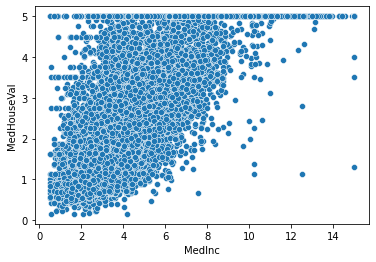

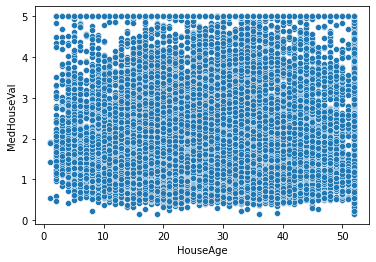

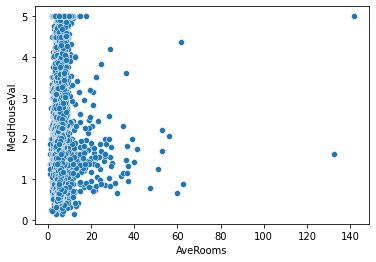

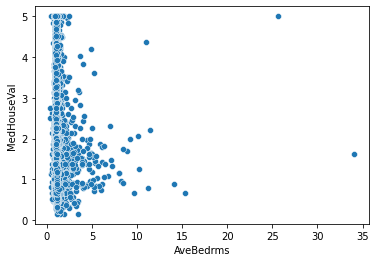

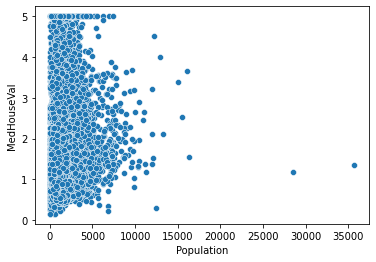

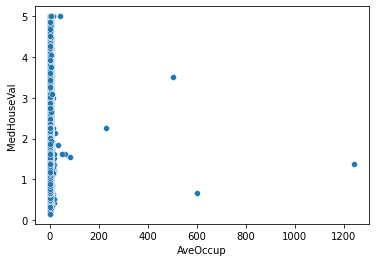

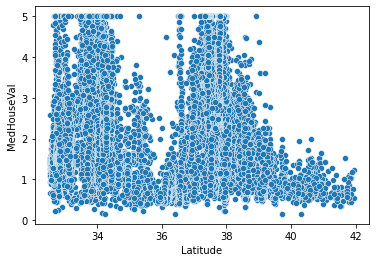

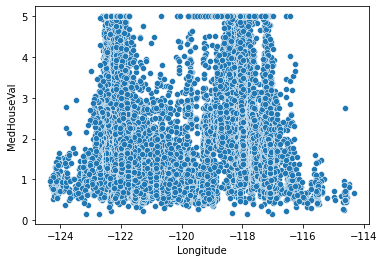

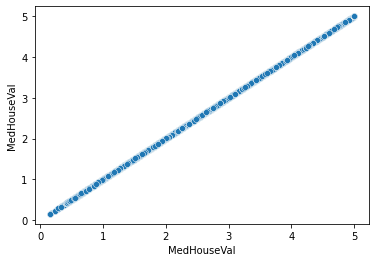

In [ ]:
for feature in vars_numericas:
   sns.scatterplot(x = df[feature], y = df['MedHouseVal'])
   plt.show()

#A seguir são demostrados os gráficos de correlação entre a variável da mediana do valor das casas e as demais variáveis do banco de dados:


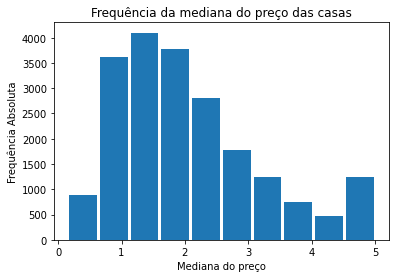

In [ ]:
plt.title('Frequência da mediana do preço das casas')
plt.xlabel('Mediana do preço')
plt.ylabel('Frequência Absoluta')
plt.hist(df['MedHouseVal'], 10, rwidth=0.9)
plt.show()

# O gráfico de distribuição de frequência demostrado abaixo apresentar a mediana do preço das casas observados através da distribuição da frequência:


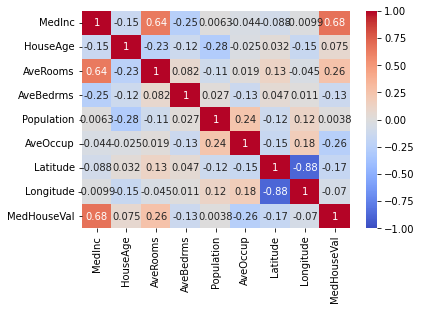

In [ ]:
# Como a distribuição da mediana do preço das casas não apresentou simétria, optou-se por utilizar a correlação de Spearman.

sns.heatmap(df.corr('spearman'), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

# O mapa de calor a seguir apresenta as correlações de Spearman entre as variáveis do banco de dados:

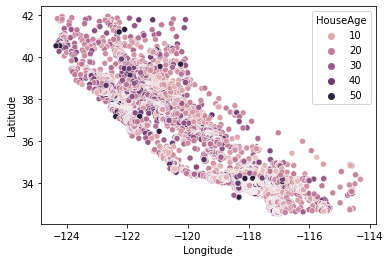

In [ ]:
# Optou-se pela plotagem de um gráfico de correlação entre as variáveis que apresentavam as maiores correlações.

from numpy import correlate
from matplotlib import pyplot

# A seguir é apresentado o gráfico da correlação entre Latitudo e Longitude:

# Neste gráfico podemos observar o comportamento de um correlação negativa. 
# Dessa forma, o resultado surgere que quanto maior Logitude menor é a Latitude.

sns.scatterplot(data=df, x="Longitude", y="Latitude", hue ='HouseAge' );



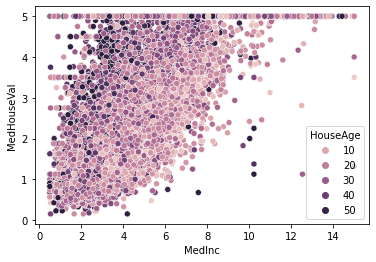

In [ ]:
# A seguir é apresentado o gráfico da correlação entre a Mediana do Preço das Casas e a Mediana da Renda:

# Neste gráfico podemos observar o comportamento de um correlação positivo. 
# Dessa forma, o resultado surgere que quanto maior a renda maior é a o valor mediano da casa.


sns.scatterplot(data=df, x="MedInc", y="MedHouseVal", hue ='HouseAge');


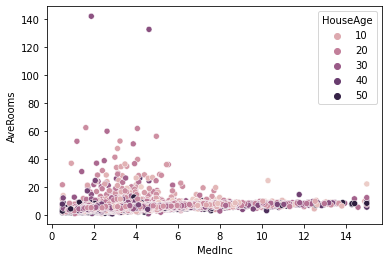

In [ ]:
# A seguir é apresentado o gráfico da correlação entre a Mediana da Renda e a Média do Número de quartos:

# Neste gráfico podemos observar o comportamento de um correlação positivo. 
# Dessa forma, o resultado surgere que quanto maior a renda maior é a média do número de quartos.

sns.scatterplot(data=df, x="MedInc", y="AveRooms",hue ='HouseAge');

## Passo 4 - Divisão

In [ ]:
# Utilize este espaço para dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste. 
# Lembre-se que, para fazer isso, é necessário distinguir o valor que o algoritmo deve adivinhar (y) 
# e os valores que devem ser dados ao algoritmo (x).
# Em seguida, construa o modelo. Como você interpreta os coeficientes do modelo?

# A seguir é criado um modelo_1 de regressão linear com o teste totalizando 30% da amostra, sem normatização:

from sklearn.model_selection import train_test_split

x=df.drop(['MedHouseVal'], axis=1)
y=df['MedHouseVal']

xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
import statsmodels.api as sm

xtreino = sm.add_constant(xtreino) # add uma constante para que possamos estimar o valor do intercepto (beta0)

modelo = sm.OLS(ytreino, xtreino).fit() #modelo e seu ajuste

resultados = modelo.summary()
print(resultados)

# A seguir podemos ver o resultado do modelo_1 criado sem normatização, no qual o R2 e R2 ajustado são iguais.
# Este modelo_1 representa aproximadamente 61% da amostra.

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2815.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:32:58   Log-Likelihood:                -15823.
No. Observations:               14448   AIC:                         3.166e+04
Df Residuals:                   14439   BIC:                         3.173e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0562      0.779    -47.577      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# A seguir é criado um modelo_2 com normatização para verificar se haverá mudanças no R2 e R2 ajustado:

# Processo de normatização:

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(df)

dataset=pd.DataFrame(scaler.transform(df),columns=df.columns)

In [ ]:
from sklearn.model_selection import train_test_split

x=dataset.drop(['MedHouseVal'], axis=1)
y=dataset['MedHouseVal']

xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
import statsmodels.api as sm

xtreino = sm.add_constant(xtreino) # add uma constante para que possamos estimar o valor do intercepto (beta0)

modelo = sm.OLS(ytreino, xtreino).fit() #modelo e seu ajuste

resultados = modelo.summary()
print(resultados)

# A seguir podemos ver o resultado do modelo_2 criado com normatização, no qual o R2 e R2 ajustado são iguais.Porém o ACI e BIC são menores.
# Este modelo representa aproximadamente 61% da amostra. Podemos concluir que este modelo representa melhor a amostra.
# Portanto, a normatização influênciou o modelo estudado.

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2815.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:32:32   Log-Likelihood:                 6989.8
No. Observations:               14448   AIC:                        -1.396e+04
Df Residuals:                   14439   BIC:                        -1.389e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7196      0.016     43.887      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Para compreender melhor se o número de variáveis influência na representativade do modelo, a seguir foi criado um novo banco de dados (df1).
# Neste banco de dados as colunas de Longitude e Latitude tiveram foram apagadas do banco.

df1 = df.drop(['Longitude','Latitude'], axis=1)

df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [ ]:
 # A seguir é criado um modelo_3 sem normatização e um número menor de variavéis para verificar se haverá mudanças no R2 e R2 ajustado:


from sklearn.model_selection import train_test_split

x=df1.drop(['MedHouseVal'], axis=1)
y=df1['MedHouseVal']

xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
import statsmodels.api as sm

xtreino = sm.add_constant(xtreino) # add uma constante para que possamos estimar o valor do intercepto (beta0)

modelo = sm.OLS(ytreino, xtreino).fit() #modelo e seu ajuste

resultados = modelo.summary()
print(resultados)

# A seguir podemos ver o resultado do modelo_3 criado com normatização, no qual o R2 e R2 ajustado são menores do que os modelos anteriores.
# Este modelo representa aproximadamente 54% da amostra. Podemos concluir que houveram alterações.
# Portanto, a um número menor de variáveis apresentou influência sobre o modelo estudado.

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     2851.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:31:49   Log-Likelihood:                -16968.
No. Observations:               14448   AIC:                         3.395e+04
Df Residuals:                   14441   BIC:                         3.400e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5517      0.034    -16.111      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Passo 5 - Previsão

In [ ]:
# Utilize este espaço para realizar suas predições. 
# Como você interpreta os valores encontrados por ela?


x_new1 = [1, 8.3252, 52, 6.238137, 1.073446, 496, 2.109842, 37.88, -122.23]

y_new = modelo.predict(x_new1)
y_new


array([4.38093072])

Sendo assim o valor previsto(estimado) para o MedInc para os parâmetros de entradas é de 4.3809, pois:

* MedInc (Y) = -37.0562 + (-10.0122 x 8.3252) + (-239.8191 x 52.0) + (519.8398 x 6.238137) + (324.3904 x 1.073446) + (-792.18412 x 496.0) + (476.7458 x 2.109842) + (101.0446 x 37.88) +(177.0642 x -122.23) = 4.3809

Logo o preço meadiano da casa previsto pelo modelo dada as característica de entradas foi de $ 438.090,00 de acordo com a nossa análise.



###**Conclusão:**

Apesar do modelo apresentado estimar um valor mediano para uma casa a partir da entrada de parâmetros estabelecidos pelo usuário, a baixa taxa do R2 ajustado sugere que este tipo de algoritmo de regressão linear pode não ser o mais adequado para previsão do valor desejado.